In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn.functional as F
import math
import time
from sklearn.model_selection import train_test_split
import random
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [5]:
# Load the image data
x_train_images = np.load('x_train_wr.npy')
x_test_images = np.load('x_test_wr.npy')
#y_train_images = np.load('y_train.npy')

In [6]:
y_train_images = pd.read_csv('y_train.csv')
y_train_images = y_train_images.iloc[:, 1].to_numpy()

y_train_images

array([7, 3, 4, ..., 2, 1, 2])

In [7]:
# Print shapes and dimensions of loaded image data
print("Shape of x_train_image_tensor:", x_train_images.shape)
print("Shape of y_train_image_tensor:", y_train_images.shape)
print("Shape of x_test_image_tensor:", x_test_images.shape)


Shape of x_train_image_tensor: (60000, 784)
Shape of y_train_image_tensor: (60000,)
Shape of x_test_image_tensor: (10000, 28, 28)


In [8]:
# Now let us split the data (x_train_image_tensor and y_train_image_tensor) into training and validation sets in the ratio 80% - 20%

In [9]:
# Reshape x_train_image_tensor from (60000, 784) to (60000, 28, 28)
x_train_images = x_train_images.reshape(-1, 28, 28)

# Split the data into training and validation sets 
x_train_image, x_valid_image, y_train_image, y_valid_image = train_test_split(x_train_images, y_train_images, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Shape of x_train:", x_train_image.shape)
print("Shape of y_train:", y_train_image.shape)
print("Shape of x_valid:", x_valid_image.shape)
print("Shape of y_valid:", y_valid_image.shape)

print("Shape of x_test:", x_test_images.shape)

Shape of x_train: (48000, 28, 28)
Shape of y_train: (48000,)
Shape of x_valid: (12000, 28, 28)
Shape of y_valid: (12000,)
Shape of x_test: (10000, 28, 28)


In [10]:
# Convert numpy arrays to PyTorch tensors
x_train_image_tensor = torch.tensor(x_train_image, dtype=torch.float32).clone().detach()
y_train_image_tensor = torch.tensor(y_train_image, dtype=torch.float32).clone().detach()
x_valid_image_tensor = torch.tensor(x_valid_image, dtype=torch.float32).clone().detach()
y_valid_image_tensor = torch.tensor(y_valid_image, dtype=torch.float32).clone().detach()
x_test_image_tensor = torch.tensor(x_test_images, dtype=torch.float32).clone().detach()

In [11]:
# Create DataLoader for image data
batch_size = 64
train_dataset_images = TensorDataset(x_train_image_tensor, y_train_image_tensor)
valid_dataset_images = TensorDataset(x_valid_image_tensor, y_valid_image_tensor)
test_dataset_images = TensorDataset(x_test_image_tensor)

train_loader_images = DataLoader(train_dataset_images, batch_size=batch_size, shuffle=False)
valid_loader_images = DataLoader(valid_dataset_images, batch_size=batch_size, shuffle=False)
test_loader_images = DataLoader(test_dataset_images, batch_size=batch_size, shuffle=False)

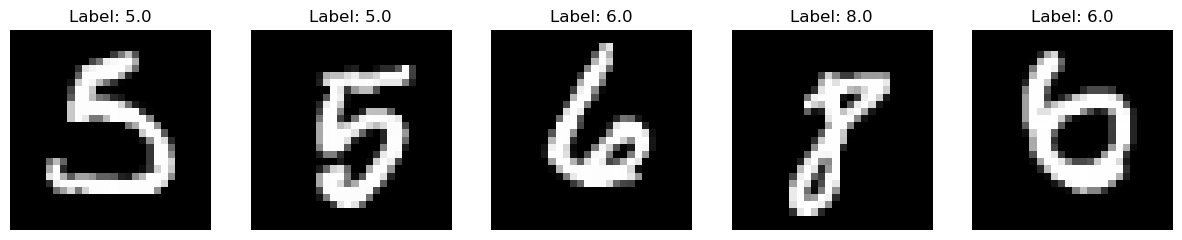

In [12]:
# Plot 5 images from the first batch of training data
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, (image, label) in enumerate(train_loader_images):
    if i == 0:
        for j in range(5):
            axes[j].imshow(image[j].squeeze(), cmap='gray')
            axes[j].set_title(f"Label: {label[j]}")
            axes[j].axis('off')
        break
plt.show()

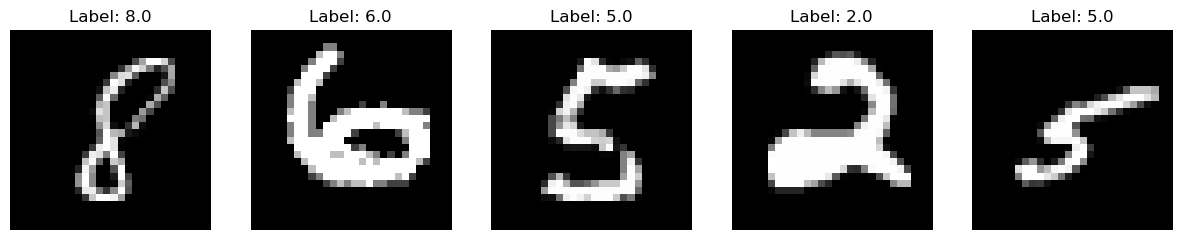

In [13]:
# Plot 5 images from the first batch of validation data
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, (image, label) in enumerate(valid_loader_images):
    if i == 0:
        for j in range(5):
            axes[j].imshow(image[j].squeeze(), cmap='gray')
            axes[j].set_title(f"Label: {label[j]}")
            axes[j].axis('off')
        break
plt.show()

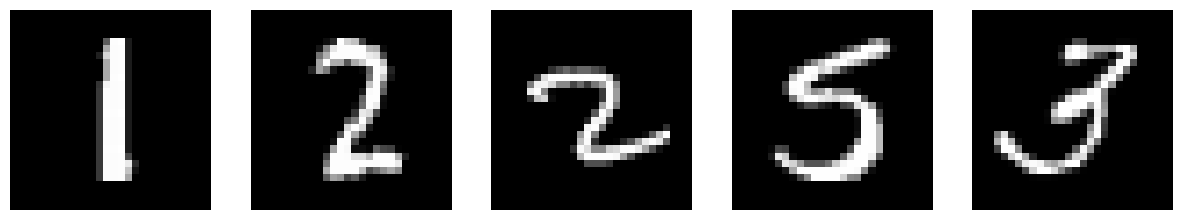

In [14]:
# Plot 5 images from the first batch of test data
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for images, in test_loader_images:
    for i in range(5):
        axes[i].imshow(images[i].squeeze(), cmap='gray')  
        axes[i].axis('off')
    break  
plt.show()


In [15]:
# the values for each image pix vlaue is between 0 and 1

In [16]:
# Now importing and transforming the audio data

In [17]:
# Load the data
x_train_audio = np.load('x_train_sp.npy')
x_test_audio = np.load('x_test_sp.npy')

In [18]:
# split into training and vlaidation datasets

x_train_audio = x_train_audio.reshape(-1, 507)

# Split the data into training and validation sets using sklearn's train_test_split
x_train_audio, x_valid_audio, y_train_audio, y_valid_audio = train_test_split(x_train_audio, y_train_images, test_size=0.2, random_state=42)

# Print the shapes of the split datasets
print("Shape of x_train:", x_train_audio.shape)
print("Shape of y_train:", y_train_audio.shape)
print("Shape of x_valid:", x_valid_audio.shape)
print("Shape of y_valid:", y_valid_audio.shape)

print("Shape of x_test:", x_test_audio.shape)

Shape of x_train: (48000, 507)
Shape of y_train: (48000,)
Shape of x_valid: (12000, 507)
Shape of y_valid: (12000,)
Shape of x_test: (10000, 507)


In [19]:
# Convert data to PyTorch tensors
x_train_audio_tensor = torch.tensor(x_train_audio, dtype=torch.float32)
y_train_audio_tensor = torch.tensor(y_train_audio, dtype=torch.float32)
x_valid_audio_tensor = torch.tensor(x_valid_audio, dtype=torch.float32)
y_valid_audio_tensor = torch.tensor(y_valid_audio, dtype=torch.float32)

x_test_audio_tensor = torch.tensor(x_test_audio, dtype=torch.float32)


In [20]:
# Create DataLoader for image data
batch_size = 64
train_dataset_audios = TensorDataset(x_train_audio_tensor, y_train_audio_tensor)
valid_dataset_audios = TensorDataset(x_valid_audio_tensor, y_valid_audio_tensor)
test_dataset_audios = TensorDataset(x_test_audio_tensor)

train_loader_audios = DataLoader(train_dataset_audios, batch_size=batch_size, shuffle=False)
valid_loader_audios = DataLoader(valid_dataset_audios, batch_size=batch_size, shuffle=False)
test_loader_audios = DataLoader(test_dataset_audios, batch_size=batch_size, shuffle=False)

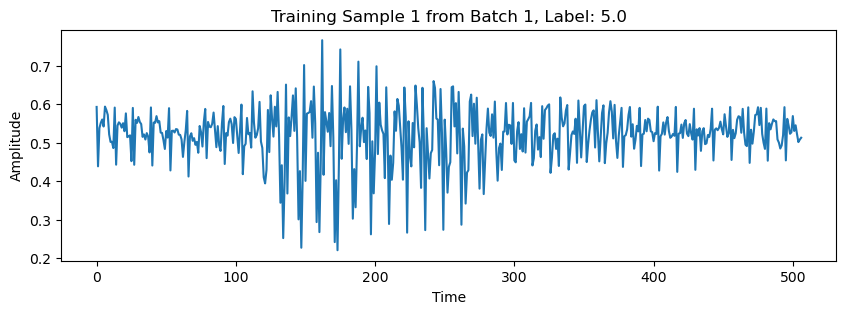

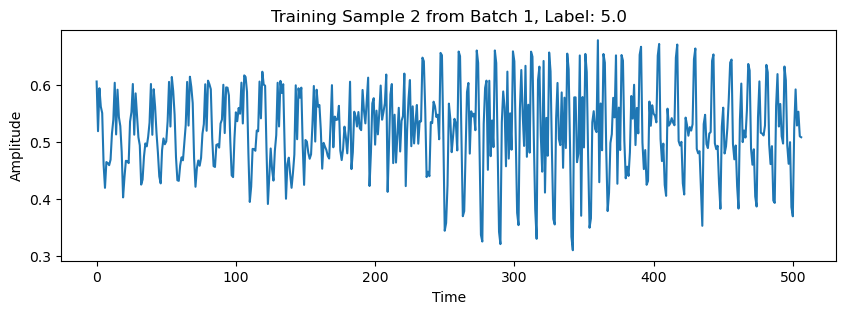

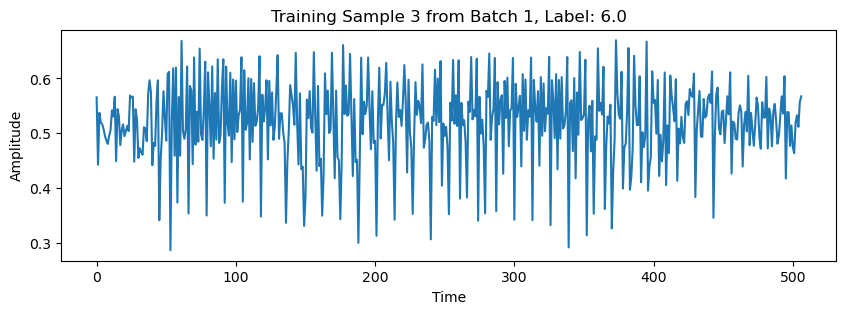

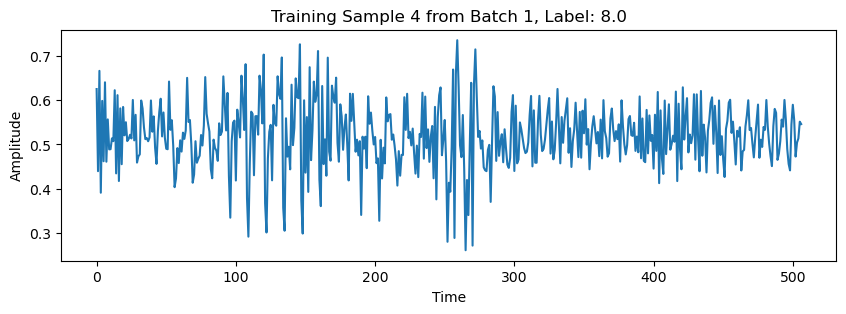

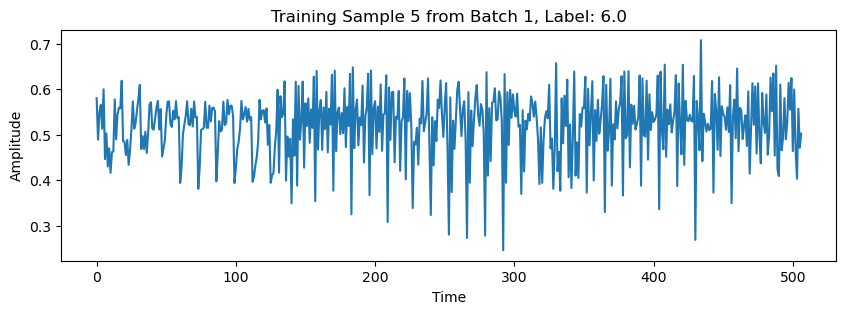

In [21]:
# Visualizing the first 5 audio samples from batch 1 of training data

for batch_idx, (x_batch, y_batch) in enumerate(train_loader_audios):
    for i in range(min(5, len(x_batch))):
        plt.figure(figsize=(10, 3))
        plt.plot(x_batch[i].numpy())
        plt.title(f'Training Sample {i+1} from Batch {batch_idx+1}, Label: {y_batch[i]}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()
    break  

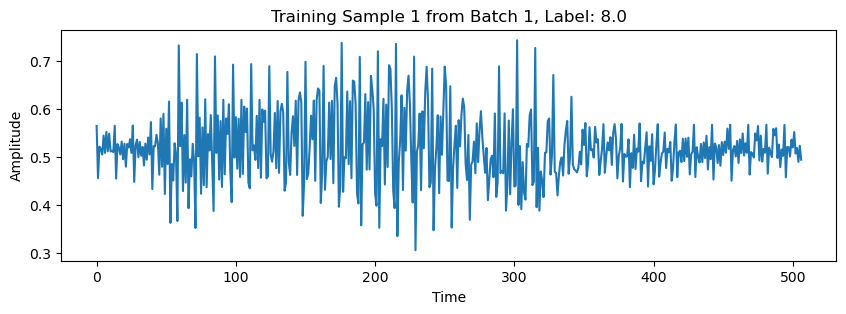

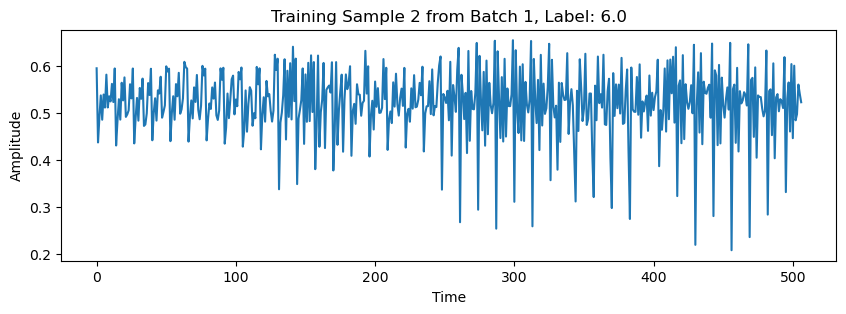

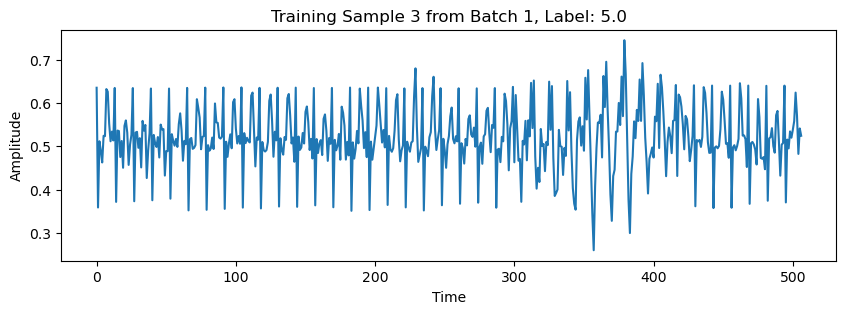

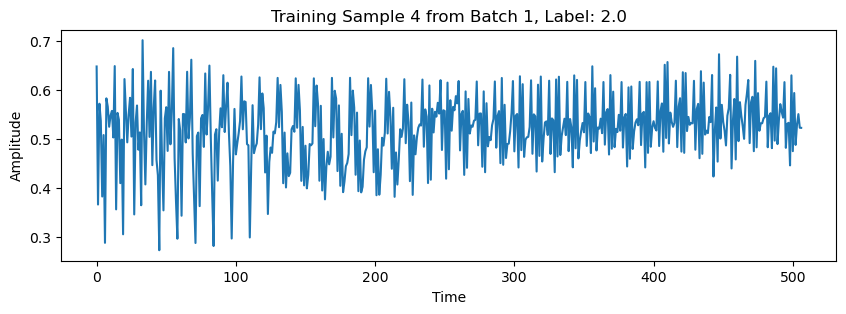

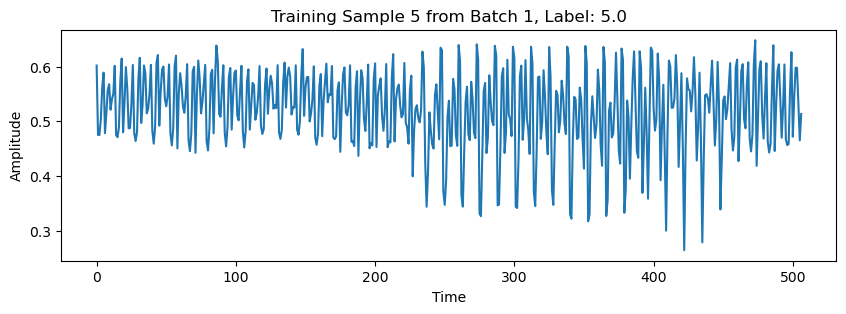

In [22]:
for batch_idx, (x_batch, y_batch) in enumerate(valid_loader_audios):
    for i in range(min(5, len(x_batch))):
        plt.figure(figsize=(10, 3))
        plt.plot(x_batch[i].numpy())
        plt.title(f'Training Sample {i+1} from Batch {batch_idx+1}, Label: {y_batch[i]}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()
    break  

In [23]:
# print("Number of batches in test_loader_audios:", len(test_loader_audios))
# for batch_idx, (x_batch,) in enumerate(test_loader_audios):
#     print(f"Batch {batch_idx+1}:")
#     print("Shape of x_batch:", x_batch.shape)

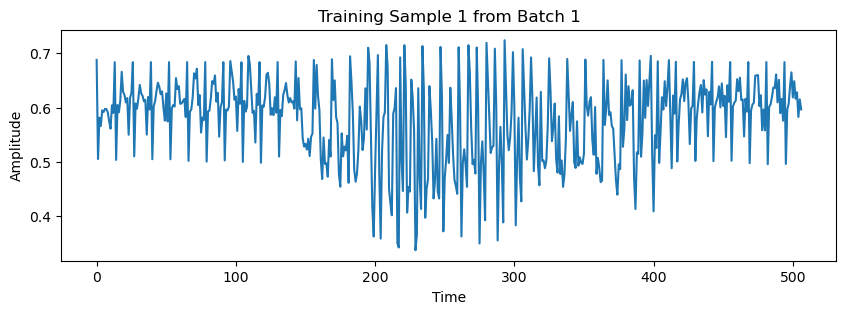

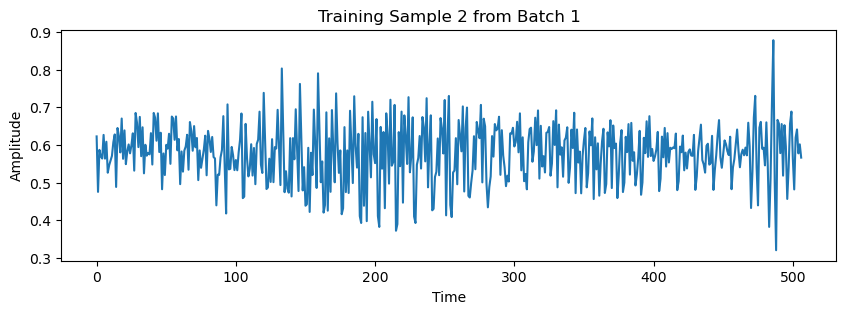

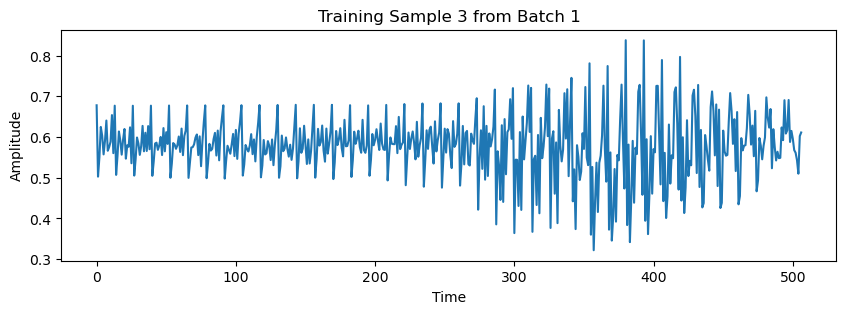

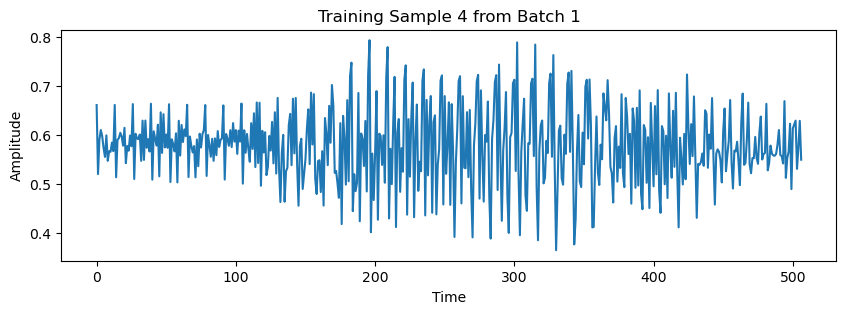

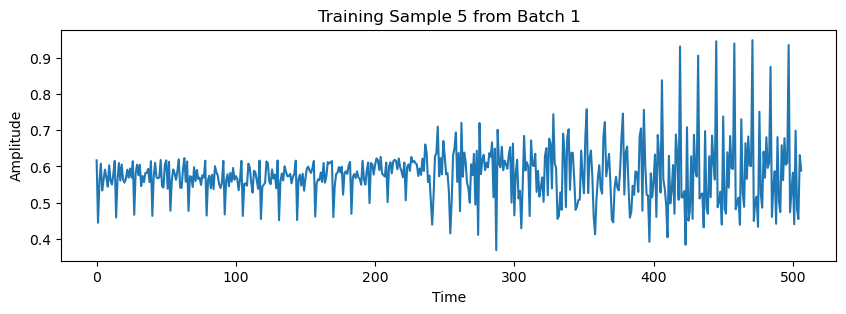

In [24]:
# Iterate through the test loader and print forst 5 samples from batch 1
for batch_idx, (x_batch,) in enumerate(test_loader_audios):
    for i in range(min(5, len(x_batch))):
        plt.figure(figsize=(10, 3))
        plt.plot(x_batch[i].numpy())
        plt.title(f'Training Sample {i+1} from Batch {batch_idx+1}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()
    break  


In [25]:
# now we see that all train, validation and test datalaoders are ready - for both images and audio
# we also plot 5 samples from each of these to see if all data is distributed as expected

# Image Model

In [27]:
# declaring a CNN model with filter size, batch normalization layer selections and activation function as hyper-parameters
# setting all layer parameters and # neurons
# calculating the input size needed for the linear layer based on the continuous CNN and pooling layers
  # eg. a 2x2 pooling layer will reduce the dimension to half for l as well as w and so on
# similarly then checking which layers are given for norm- i do batch normalizations
# In forward we set the layer sequencing

class CNNModel(nn.Module):
    def __init__(self, filter_size=3, batchNorm=["l1", "l2", "l3", "l4"], actFun="relu"):
        super().__init__()
        self.batchNorm = batchNorm
        self.activation_function = actFun
        self.StrideSize = 1
        self.out1 = 6
        self.out2 = 12
        self.out3 = 24
        self.out4 = 48
        self.dim = 28
        self.c1, self.c2 = 2, 2

        size_after_conv_layersc1 = self.dim - ((filter_size - self.StrideSize) * self.c1)
        size_after_pool1 = math.ceil(size_after_conv_layersc1 / 2)
        size_after_conv_layersc2 = size_after_pool1 - ((filter_size - self.StrideSize) * self.c2)
        self.size_after_pool2 = int(math.ceil(size_after_conv_layersc2 / 2))

        self.conv1 = nn.Conv2d(1, self.out1, filter_size, self.StrideSize)
        self.conv2 = nn.Conv2d(self.out1, self.out2, filter_size, self.StrideSize)
        self.conv3 = nn.Conv2d(self.out2, self.out3, filter_size, self.StrideSize)
        self.conv4 = nn.Conv2d(self.out3, self.out4, filter_size, self.StrideSize)

        self.fc1 = nn.Linear(48 * self.size_after_pool2 * self.size_after_pool2, 120) 
        self.fc2 = nn.Linear(120, 64)
        self.fc3 = nn.Linear(64, 10)

        if "l1" in self.batchNorm:
            self.batch_norm1 = nn.BatchNorm2d(6)
        if "l2" in self.batchNorm:
            self.batch_norm2 = nn.BatchNorm2d(12)
        if "l3" in self.batchNorm:
            self.batch_norm3 = nn.BatchNorm2d(24)
        if "l4" in self.batchNorm:
            self.batch_norm4 = nn.BatchNorm2d(48)

        self.dropout = nn.Dropout(0.05)

    def forward(self, x):
        if "l1" in self.batchNorm:
            x = self.batch_norm1(getattr(F, self.activation_function)(self.conv1(x)))
        else:
            x = getattr(F, self.activation_function)(self.conv1(x))
        x = getattr(F, self.activation_function)(self.conv2(x))
        if "l2" in self.batchNorm:
            x = self.batch_norm2(x)
        x = F.max_pool2d(x, 2, 2)

        if "l3" in self.batchNorm:
            x = self.batch_norm3(getattr(F, self.activation_function)(self.conv3(x)))
        else:
            x = getattr(F, self.activation_function)(self.conv3(x))
        x = getattr(F, self.activation_function)(self.conv4(x))
        if "l4" in self.batchNorm:
            x = self.batch_norm4(x)
        x = F.max_pool2d(x, 2, 2)

        x = x.view(-1, 48 * self.size_after_pool2 * self.size_after_pool2)  

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x1 = self.dropout(x)
        x = F.relu(self.fc3(x1))
        log_softmax_output = F.log_softmax(x, dim=1)

        return x, x1


In [ ]:
# dictionaries are formed for storing model wise embeddings when we tune model for differnet hyper parameters
# the setup is done in such a way that embeddings and labels for only the best model will be fetched


In [28]:
# this block just gives an example of how models will be named
normLayers = ["l1","l2","l3","l4","l5"]
actFun = "tanh"
filter_size = 3
model_name = f"CNNImagemodel_{'_'.join(normLayers)}_{actFun}_{filter_size}"
model_name


'CNNImagemodel_l1_l2_l3_l4_l5_tanh_3'

In [29]:

start_time = time.time()

epochs = 10
train_losses, test_losses = [], []
train_correct, test_correct = [], []
best_image_embedding_per_model, image_embedding_list = {}, {}
overalMaxAccuracy = 0
image_labels = {}
cnt =0
# Setting hyper parameters
# 1. set layers that we want to normalize - tune this

# Uncommment to tune!
#batchNormLayers = [["l1","l2","l3","l4","l5"], ["l1","l2"],["l1","l3","l4"]]

batchNormLayers = [["l1","l2","l3","l4","l5"]]

# 2. set activation functions to tune

# Uncomment below to tune
#actFuns = ["tanh", "relu"]
actFuns = ["tanh"]

# 3. filter size to tune

# Uncomment below to tune
#filter_sizes = [5,3]

filter_sizes = [3]
# run 3 loops - to perform tuning of the above three hyper parameters
for normLayers in batchNormLayers:
    for actFun in actFuns:
        for filter_size in filter_sizes:
            model_name = f"CNNImagemodel_{'_'.join(normLayers)}_{actFun}_{filter_size}"
            image_embedding_list[model_name] = []
            image_labels[model_name] = []
            torch.manual_seed(41)
            # declare the model with each parameter picked by loop iteration
            model = CNNModel(filter_size, normLayers, actFun)
            
            criterion = nn.CrossEntropyLoss()
            optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

            for i in range(epochs):
                train_corr = 0
                test_corr = 0

                for b, (X_train, y_train) in enumerate(train_loader_images):
                    # Reshape input data to 4D
                    X_train = X_train.view(-1, 1, 28, 28)

                    y_pred, image_embedding = model(X_train)
                    #print(image_embedding.shape)
                    if i == epochs-1:
                        #print('here')
                        image_embedding_list[model_name].append(image_embedding)
                        cnt+=1
                        image_labels[model_name].append(y_train)
                        # put in a dict with model name and pick for best model
                    y_train = y_train.long()
                    loss = criterion(y_pred, y_train)
                    # make predictions
                    predicted = torch.max(y_pred.data, 1)[1]
                    batch_corr = (predicted == y_train).sum()
                    train_corr += batch_corr

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    if b % 600 == 0:
                        print("epoch: ", i)
                        print("batch: ", b)
                        print("loss: ", loss.item())

                #image_embedding_list.append(image_embedding[:-1])
                train_losses.append(loss)
                train_correct.append(train_corr)

                # Calculate training accuracy
                train_accuracy = train_corr.item() / len(train_loader_images.dataset)

                # Testing
                test_pred = []
                test_true = []
                with torch.no_grad(): # no training anymore
                    for b, (X_test, y_test) in enumerate(valid_loader_images):
                        X_test = X_test.view(-1, 1, 28, 28)
                        y_val, _ = model(X_test)
                        y_test = y_test.long()
                        predicted = torch.max(y_val.data, 1)[1]
                        test_pred.extend(predicted.tolist())
                        test_true.extend(y_test.tolist())

                    test_pred = torch.tensor(test_pred)
                    test_true = torch.tensor(test_true)

                    batch_size = X_test.size(0)  # Get the actual batch size
                    if batch_size == len(y_test):  # Check if this is the last batch
                        test_accuracy = torch.sum(predicted == y_test).item() / batch_size
                        loss = criterion(y_val, y_test)
                    else:
                        test_accuracy = torch.sum(predicted == y_test[:batch_size]).item() / batch_size
                        loss = criterion(y_val, y_test[:batch_size])

                test_losses.append(loss)
                test_correct.append(torch.sum(test_pred == test_true))
                # Calculate testing accuracy
                test_accuracy = torch.sum(test_pred == test_true).item() / len(valid_loader_images.dataset)
                
                # basically get embeddings for the last batch of the 9th epoch
                
                
                
                if test_accuracy > overalMaxAccuracy and i == epochs-1:
                    bestModel = model
                    bestModel_name = model_name
                    overalMaxAccuracy = test_accuracy
                    best_image_embedding_per_model[model_name] = image_embedding


                print("Using Normalization for layers: ", normLayers, "Activation Fucntion: ", actFun, "filter size: ", filter_size)
                print(f"Epoch {i+1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Testing Accuracy: {test_accuracy:.4f}")

current_time = time.time()
total_time = current_time - start_time
print("Training time: ", total_time/60, "mins")


epoch:  0
batch:  0
loss:  2.3026225566864014
epoch:  0
batch:  600
loss:  0.23230119049549103
Using Normalization for layers:  ['l1', 'l2', 'l3', 'l4', 'l5'] Activation Fucntion:  tanh filter size:  3
Epoch 1/10, Training Accuracy: 0.8031, Testing Accuracy: 0.9497
epoch:  1
batch:  0
loss:  0.1722724437713623
epoch:  1
batch:  600
loss:  0.17595010995864868
Using Normalization for layers:  ['l1', 'l2', 'l3', 'l4', 'l5'] Activation Fucntion:  tanh filter size:  3
Epoch 2/10, Training Accuracy: 0.9668, Testing Accuracy: 0.9677
epoch:  2
batch:  0
loss:  0.09854847192764282
epoch:  2
batch:  600
loss:  0.10200972855091095
Using Normalization for layers:  ['l1', 'l2', 'l3', 'l4', 'l5'] Activation Fucntion:  tanh filter size:  3
Epoch 3/10, Training Accuracy: 0.9778, Testing Accuracy: 0.9754
epoch:  3
batch:  0
loss:  0.06197996065020561
epoch:  3
batch:  600
loss:  0.14357905089855194
Using Normalization for layers:  ['l1', 'l2', 'l3', 'l4', 'l5'] Activation Fucntion:  tanh filter size:  

In [30]:
bestModel

CNNModel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=768, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (batch_norm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm4): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.05, inplace=False)
)

In [31]:
# getting parameters for the best model picked while tuning the model

image_embedding_best_model = best_image_embedding_per_model[bestModel_name]
best_image_embedding_list = image_embedding_list[bestModel_name]
best_image_labels = image_labels[bestModel_name]

In [32]:
print(image_embedding_best_model.shape)
print(len(best_image_embedding_list))
print(len(best_image_labels))

torch.Size([64, 64])
750
750


In [33]:
image_embedding_best_model.shape

image_embedding_np = image_embedding.detach().numpy()

# Convert NumPy array to DataFrame
df = pd.DataFrame(image_embedding_np)

# Export DataFrame to Excel
df.to_excel('image_embedding.xlsx', index=False)

In [34]:
# make predictions
predictedAll = []
with torch.no_grad():
    for X_test in test_loader_images:
        X_test = X_test[0]
        X_test = X_test.view(-1, 1, 28, 28)
        y_val, _ = bestModel(X_test)
        predicted = torch.max(y_val.data, 1)[1]
        predictedAll.append(predicted)

# Concatenate predictions from all batches
all_predictions = torch.cat(predictedAll, dim=0)

print(all_predictions.shape) 


torch.Size([10000])


In [35]:
# export the data to excel
finalPreds = pd.DataFrame(all_predictions, columns=["preds"])
finalPreds.to_csv("img_preds_2604_8pm.csv", index=False)

# Audio model

In [36]:
# new
class RNNAudioModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNNAudioModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='relu')
        self.fc1 = nn.Linear(hidden_size, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.fc2 = nn.Linear(100, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, num_classes)
        self.bn3 = nn.BatchNorm1d(num_classes)

    def forward(self, x):
        batch_size = x.size(0)
        seq_len = x.size(1)
        
        # Reshape input tensor to have shape (batch_size, seq_len, input_size)
        x = x.unsqueeze(1).repeat(1, seq_len, 1)
        
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc1(out[:, -1, :])
        out = self.bn1(out)
        out = torch.relu(out)
        out = self.fc2(out)
        out1 = self.bn2(out)
        out = self.fc3(out1)
        out = self.bn3(out)
        return out, out1

In [37]:
input_size = x_train_audio.shape[1]

# uncomment to tune
#hidden_size_list = [320,350,400] 
hidden_size_list = [320]

#uncomment to tune
# num_layers_list = [1,2]

num_layers_list = [1]
num_classes = 10  # there are 10 output classes representing digits 0-9
learning_rate = 0.0001

In [38]:
# Training

start_time = time.time()
best_audio_embedding_per_model, audio_embedding_list = {}, {}
audio_labels = {}
num_epochs = 25
max_valid_accuracy = 0

for hidden_size in hidden_size_list:
    for num_layers in num_layers_list:
        RNNmodel = RNNAudioModel(input_size, hidden_size, num_layers, num_classes)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(RNNmodel.parameters(), lr=learning_rate)
        model_name = f"RNNmodel_{'_'.join(normLayers)}_{actFun}_{filter_size}"
        audio_embedding_list[model_name] = []
        audio_labels[model_name] = []
        
        for epoch in range(num_epochs):
            RNNmodel.train()
            train_loss = 0.0
            train_correct = 0
            train_total = 0

            for batch_idx, (inputs, labels) in enumerate(train_loader_audios):
                inputs, labels = inputs, labels

                optimizer.zero_grad()
                outputs, audio_embedding = RNNmodel(inputs)
                if epoch== num_epochs-1:
                    audio_embedding_list[model_name].append(audio_embedding)
                    audio_labels[model_name].append(labels)
                # Convert labels to Long data type
                labels = labels.long()

                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * inputs.size(0)  
                _, predicted = outputs.max(1)
                train_correct += predicted.eq(labels).sum().item()
                train_total += labels.size(0)  

            train_loss /= len(train_loader_audios.dataset)  
            train_acc = train_correct / train_total

            # Validation
            RNNmodel.eval()
            valid_loss = 0.0
            valid_correct = 0
            valid_total = 0

            with torch.no_grad():
                for b, (inputs, labels) in enumerate(valid_loader_audios):
                    inputs, labels = inputs, labels
                    outputs, _ = RNNmodel(inputs)

                    # Convert labels to Long data type
                    labels = labels.long()

                    loss = criterion(outputs, labels)

                    valid_loss += loss.item() * inputs.size(0)  
                    _, predicted = outputs.max(1)
                    valid_correct += predicted.eq(labels).sum().item()
                    valid_total += labels.size(0)  

            valid_loss /= len(valid_loader_audios.dataset) 
            valid_acc = valid_correct / valid_total
            
            if valid_acc*100 > max_valid_accuracy*100 and epoch == num_epochs-1:
                max_valid_accuracy = valid_acc
                best_model = RNNmodel
                best_model_name = model_name
                best_audio_embedding_per_model[model_name] = audio_embedding
                
            print("Using hidden size of: ",hidden_size,"num layers: ", num_layers)   
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                  f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
                  f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}")

current_time = time.time()
total_time = current_time - start_time
print("Training time:", total_time/60, "mins")

Using hidden size of:  320 num layers:  1
Epoch [1/25], Train Loss: 1.2827, Train Acc: 0.6314, Valid Loss: 0.9571, Valid Acc: 0.7777
Using hidden size of:  320 num layers:  1
Epoch [2/25], Train Loss: 0.8947, Train Acc: 0.7969, Valid Loss: 0.7977, Valid Acc: 0.8275
Using hidden size of:  320 num layers:  1
Epoch [3/25], Train Loss: 0.7697, Train Acc: 0.8402, Valid Loss: 0.7139, Valid Acc: 0.8518
Using hidden size of:  320 num layers:  1
Epoch [4/25], Train Loss: 0.6899, Train Acc: 0.8615, Valid Loss: 0.6691, Valid Acc: 0.8598
Using hidden size of:  320 num layers:  1
Epoch [5/25], Train Loss: 0.6293, Train Acc: 0.8767, Valid Loss: 0.6067, Valid Acc: 0.8748
Using hidden size of:  320 num layers:  1
Epoch [6/25], Train Loss: 0.5804, Train Acc: 0.8888, Valid Loss: 0.5669, Valid Acc: 0.8830
Using hidden size of:  320 num layers:  1
Epoch [7/25], Train Loss: 0.5394, Train Acc: 0.8990, Valid Loss: 0.5379, Valid Acc: 0.8871
Using hidden size of:  320 num layers:  1
Epoch [8/25], Train Loss: 0

In [39]:
best_model

RNNAudioModel(
  (rnn): RNN(507, 320, batch_first=True)
  (fc1): Linear(in_features=320, out_features=100, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=100, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [40]:
# storing parameters for the best model picked while tuning
bestRNN = best_model
bestAudioEmbeddings = best_audio_embedding_per_model[best_model_name]
best_audio_embedding_list = audio_embedding_list[best_model_name]
best_audio_labels = audio_labels[best_model_name]

In [41]:
print(len(audio_labels))
print(bestAudioEmbeddings.shape)
print(len(best_audio_embedding_list))

1
torch.Size([64, 64])
750


In [42]:
bestRNN.eval()
predictedAll = []

with torch.no_grad():
    for data in test_loader_audios:
        inputs = data[0]  
        outputs, _ = bestRNN(inputs)
        predicted = torch.argmax(outputs, 1)
        predictedAll.append(predicted)

# Concatenate predictions from all samples
all_predictions = torch.cat(predictedAll, dim=0)

print(all_predictions.shape)  


torch.Size([10000])


In [43]:
# export the data to excel
finalPreds = pd.DataFrame(all_predictions, columns=["preds"])
finalPreds.to_csv("rnn_audio_preds_2604_8pm.csv", index=False)

# Multi-modal Model

In [45]:

class MultimodalModel(nn.Module):
    def __init__(self, image_model, audio_model, num_classes, n_fc):
        super(MultimodalModel, self).__init__()
        self.image_model = image_model
        self.audio_model = audio_model
        self.n_fc = n_fc
        if n_fc == 1:
            self.fc1 = nn.Linear(64+64, num_classes) 
        else:
            self.fc1 = nn.Linear(64+64, 64)  
            self.fc2 = nn.Linear(64, num_classes)  

    def forward(self, image_input, audio_input):
        _, image_out = self.image_model(image_input)
        _, audio_out = self.audio_model(audio_input)
        
        image_out = F.relu(image_out)
        audio_out = F.relu(audio_out)
        
        combined_out = torch.cat((image_out, audio_out), dim=1)
#         print("here")
#         print(combined_out.shape)
        if n_fc == 1:
            output1 = self.fc1(combined_out)
        else:
            output = self.fc1(combined_out)
            output1 = self.fc2(output)
        return output1


def validate_multimodal_model(multimodal_model, image_loader, audio_loader, criterion):
    total_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for image_data, audio_data in zip(image_loader, audio_loader):
            image_inputs, image_labels = image_data
            audio_inputs, audio_labels = audio_data
            image_inputs = image_inputs.view(-1, 1, 28, 28)

            outputs = multimodal_model(image_inputs, audio_inputs)
            loss = criterion(outputs, image_labels.long())
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += image_labels.size(0)
            correct += (predicted == image_labels).sum().item()

    accuracy = 100 * correct / total
    return total_loss / len(image_loader), accuracy


def train_multimodal_model(multimodal_model, image_loader, audio_loader, criterion, optimizer, image_valid_loader, audio_valid_loader, epochs=10):
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (image_data, audio_data) in enumerate(zip(image_loader, audio_loader)):
            image_inputs, image_labels = image_data
            audio_inputs, audio_labels = audio_data
            image_inputs = image_inputs.view(-1, 1, 28, 28)
            optimizer.zero_grad()

            # Forward pass
            outputs = multimodal_model(image_inputs, audio_inputs)
            loss = criterion(outputs, image_labels.long())

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Print loss for each batch
            if i % 100 == 99:  
                print(f'Epoch {epoch+1}, Batch {i+1}/{len(image_loader)}, Loss: {running_loss/100}')
                running_loss = 0.0

        # Print epoch loss
        epoch_loss = running_loss / len(image_loader)
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {epoch_loss}')

        # Validation
        if image_valid_loader is not None and audio_valid_loader is not None:
            val_loss, val_accuracy = validate_multimodal_model(multimodal_model, image_valid_loader, audio_valid_loader, criterion)
            print(f'Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}%')
    print('Training Finished!')
    return val_accuracy

def predict_multimodal_model(multimodal_model, image_loader, audio_loader):
    predictions = []
    with torch.no_grad():
        for (image_inputs), (audio_inputs) in zip(image_loader, audio_loader):
            
            image_inputs = image_inputs[0]
            image_inputs = image_inputs.view(-1, 1, 28, 28)
            audio_inputs = audio_inputs[0]
            outputs = multimodal_model(image_inputs, audio_inputs)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.numpy())
    return predictions


In [46]:
# Create the multi-modal model

# uncomment to tune
# number_of_fc = [1,2]

number_of_fc = [1]
max_mm_accuracy = 0
for n_fc in number_of_fc:
    multimodal_model = MultimodalModel(bestModel, bestRNN, 10, n_fc)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(multimodal_model.parameters())

    # Train the multi-modal model
    curr_accuracy = train_multimodal_model(multimodal_model, train_loader_images, train_loader_audios, criterion, optimizer, valid_loader_images, valid_loader_audios, 10)
    if curr_accuracy > max_mm_accuracy:
        max_mm_accuracy = curr_accuracy
        bestMMmodel = multimodal_model
    

Epoch 1, Batch 100/750, Loss: 0.41273314841091635
Epoch 1, Batch 200/750, Loss: 0.08972458861768245
Epoch 1, Batch 300/750, Loss: 0.07384253626223654
Epoch 1, Batch 400/750, Loss: 0.0750385313341394
Epoch 1, Batch 500/750, Loss: 0.05490443530259654
Epoch 1, Batch 600/750, Loss: 0.060205521183088424
Epoch 1, Batch 700/750, Loss: 0.057963678801897914
Epoch 1/10, Training Loss: 0.003401441189770897
Epoch 1/10, Validation Loss: 0.06806062182357059, Validation Accuracy: 97.93333333333334%
Epoch 2, Batch 100/750, Loss: 0.04693756250548176
Epoch 2, Batch 200/750, Loss: 0.044314959121402354
Epoch 2, Batch 300/750, Loss: 0.04215305065503344
Epoch 2, Batch 400/750, Loss: 0.05175722547108307
Epoch 2, Batch 500/750, Loss: 0.03661577585968189
Epoch 2, Batch 600/750, Loss: 0.041512109600007535
Epoch 2, Batch 700/750, Loss: 0.04393152609583922
Epoch 2/10, Training Loss: 0.0026677962654891112
Epoch 2/10, Validation Loss: 0.066467254051686, Validation Accuracy: 98.075%
Epoch 3, Batch 100/750, Loss: 0.0

In [47]:
# Make predictions using the multi-modal model
predictions = predict_multimodal_model(bestMMmodel, test_loader_images, test_loader_audios)


In [48]:
# export the data to excel
#finalPreds = pd.DataFrame(predictions, columns=["preds"])
finalPreds = pd.DataFrame({'row_id': range(len(predictions)), 'preds': predictions})

finalPreds.to_csv("NehaJoshi_preds_multimodal.csv", index=False)

In [49]:
#(t-SNE) t-Distributed Stochastic Neighbor Embedding 

# very very slow!

In [50]:
# RUn the below to use pre - saved embeddings:

In [51]:
# Convert the list of NumPy arrays to a single NumPy array
image_embedding_numpy_list = [tensor.detach().numpy() for tensor in best_image_embedding_list]
audio_embedding_numpy_list = [tensor.detach().numpy() for tensor in best_audio_embedding_list]

image_embeddings_np = np.concatenate(image_embedding_numpy_list, axis=0)
audio_embeddings_np = np.concatenate(audio_embedding_numpy_list, axis=0)


In [52]:
# Reshape to the desired shape
image_embeddings_np = image_embeddings_np.reshape(-1, 64)
audio_embeddings_np = audio_embeddings_np.reshape(-1, 64)

In [53]:
print(image_embeddings_np.shape)
print(audio_embeddings_np.shape)

(48000, 64)
(48000, 64)


In [54]:
# save embeddings as numpy files

np.save('image_embedding.npy', image_embeddings_np)
np.save('audio_embedding.npy', audio_embeddings_np)

In [55]:
# image_embeddings_np = np.load('image_embedding.npy')
# audio_embedding_np = np.load('audio_embedding.npy')

In [56]:
print(image_embeddings_np.shape)
print(audio_embeddings_np.shape)

(48000, 64)
(48000, 64)


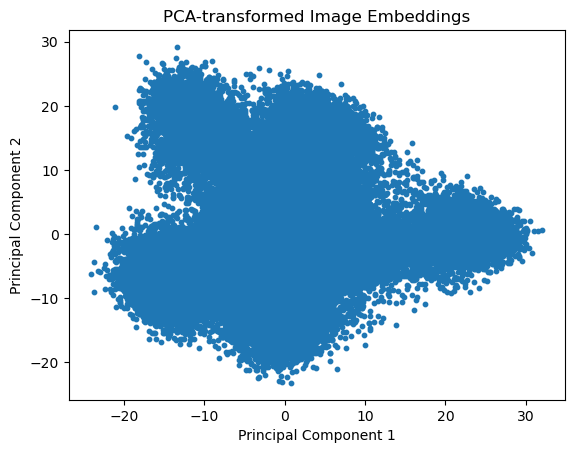

In [57]:

# Load embeddings from npy files
image_embedding = image_embeddings_np

# Apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
image_embedding_pca = pca.fit_transform(image_embedding)

plt.scatter(image_embedding_pca[:, 0], image_embedding_pca[:, 1], s=10)
plt.title('PCA-transformed Image Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



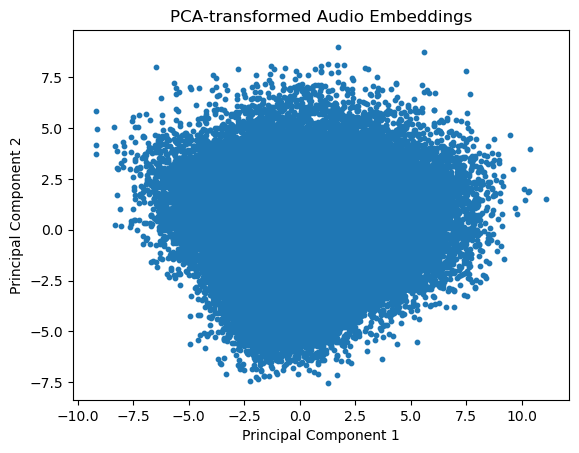

In [58]:
pca = PCA(n_components=2, svd_solver='randomized') 

audio_embedding = audio_embeddings_np
audio_embedding_pca = pca.fit_transform(audio_embedding)



plt.scatter(audio_embedding_pca[:, 0], audio_embedding_pca[:, 1], s=10)
plt.title('PCA-transformed Audio Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [59]:
# reference: CSCE 633 discussion on K means clustering and PCA

class KMeans:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter

    def _init_centroids(self):
        return list(self.X[np.random.choice(self.X.shape[0], self.k, replace=False)])

    def _d(self, x, y):  # Euclidean distance
        return np.linalg.norm(x - y)

    def _cluster_assgnmnt(self):
        cluster_assignments = [[] for centroid in self.centroids]

        for i in range(self.X.shape[0]):
            centroid = np.argmin([self._d(self.X[i, :], centroid) for centroid in self.centroids])
            cluster_assignments[centroid].append(i)
        return cluster_assignments

    def _update_centroids(self, cluster_assignments):
        for i in range(len(self.centroids)):
            self.centroids[i] = np.mean(self.X[cluster_assignments[i]], axis=0)
        return self.centroids

    def fit(self, X):
        self.X = X

        self.centroids = self._init_centroids()
        cluster_assignments = self._cluster_assgnmnt()
        #self._plot(cluster_assignments)

        for i in range(self.max_iter):
            # assign clusters
            cluster_assignments = self._cluster_assgnmnt()

            # update centroids
            self.centroids = self._update_centroids(cluster_assignments)

            #if i % 5 == 4:
            #self._plot(cluster_assignments)
        self._plot(cluster_assignments)

    def _plot(self, cluster_assignments):
        idx_to_c = [None] * self.X.shape[0]
        for c, idxs in enumerate(cluster_assignments):
            for i in idxs:
                idx_to_c[i] = c

        plt.figure()
        plt.scatter(self.X[:, 0], self.X[:, 1], c=idx_to_c)
        plt.show()


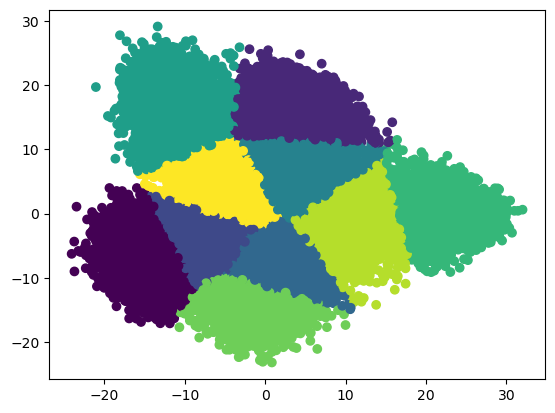

In [60]:
kmeans = KMeans(k=10, max_iter=100)
kmeans.fit(image_embedding_pca)

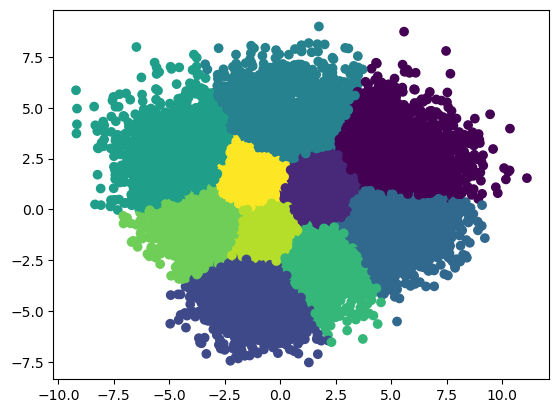

In [61]:
kmeans = KMeans(k=10, max_iter=100)
kmeans.fit(audio_embedding_pca)

In [62]:
len(best_audio_labels)
# best_image_labels

750

In [63]:
flattened_audio_labels = []
for tensor in best_audio_labels:
    flattened_audio_labels.extend(tensor.tolist())

# Verify the length of the flattened list (should be 48000)
print(len(flattened_audio_labels))


48000


In [64]:
flattened_image_labels = []
for tensor in best_image_labels:
    flattened_image_labels.extend(tensor.tolist())

# Verify the length of the flattened list (should be 48000)
print(len(flattened_image_labels))


48000


In [65]:
audio_embedding_pca

array([[-0.6466216 , -2.0306025 ],
       [ 0.27120513,  3.4506712 ],
       [-0.6186146 , -4.435451  ],
       ...,
       [ 1.0864191 , -0.53280944],
       [ 4.133924  ,  2.2590222 ],
       [-0.3619822 , -1.3152393 ]], dtype=float32)

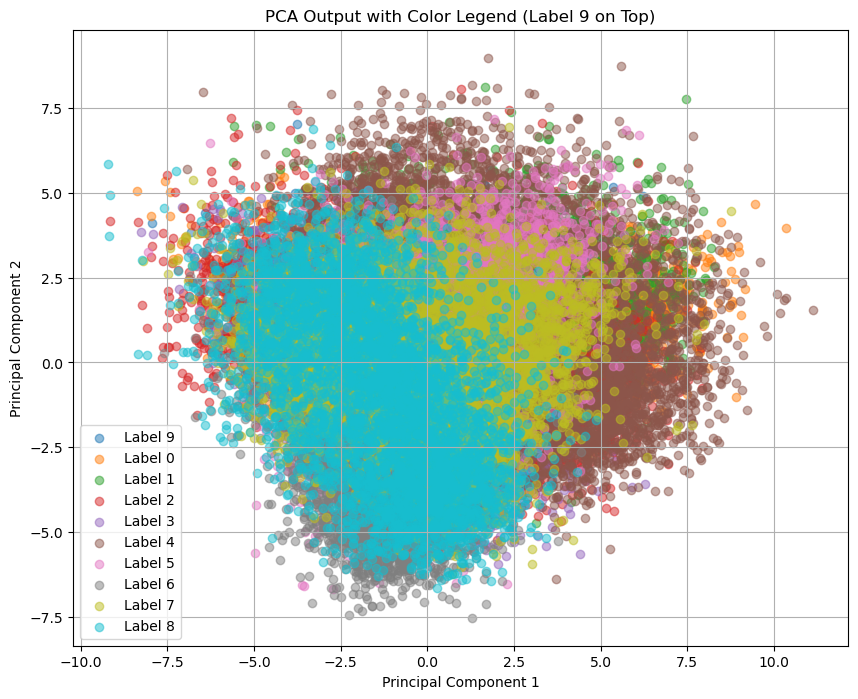

In [66]:
# Plot all points with corresponding labels except label 9
plt.figure(figsize=(10, 8))
# Plot points corresponding to label 9
indices_9 = [idx for idx, label in enumerate(flattened_audio_labels) if label == 9]
x_9 = audio_embedding_pca[indices_9, 0]
y_9 = audio_embedding_pca[indices_9, 1]
plt.scatter(x_9, y_9, label='Label 9', alpha=0.5)

for i in range(10):  
    if i != 9:
        indices = [idx for idx, label in enumerate(flattened_audio_labels) if label == i]
        x = audio_embedding_pca[indices, 0]
        y = audio_embedding_pca[indices, 1]
        plt.scatter(x, y, label=f'Label {i}', alpha=0.5)


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Output with Color Legend (Label 9 on Top)')
plt.legend()
plt.grid(True)
plt.show()


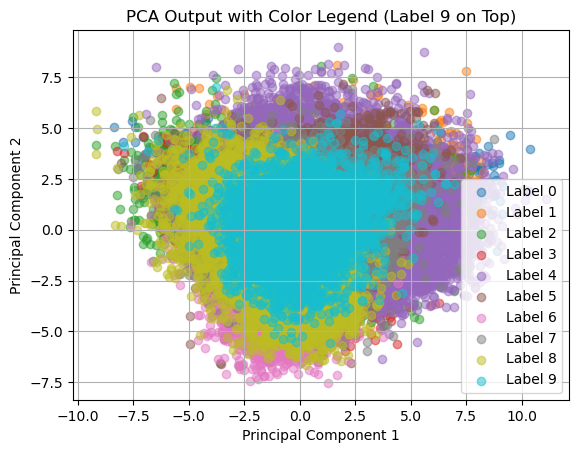

In [67]:
# # plotting in differnet sequence 

# for i in range(10): 

#     indices = [idx for idx, label in enumerate(flattened_audio_labels) if label == i]
#     x = audio_embedding_pca[indices, 0]
#     y = audio_embedding_pca[indices, 1]
#     plt.scatter(x, y, label=f'Label {i}', alpha=0.5)


# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Output with Color Legend (Label 9 on Top)')
# plt.legend()
# plt.grid(True)
# plt.show()


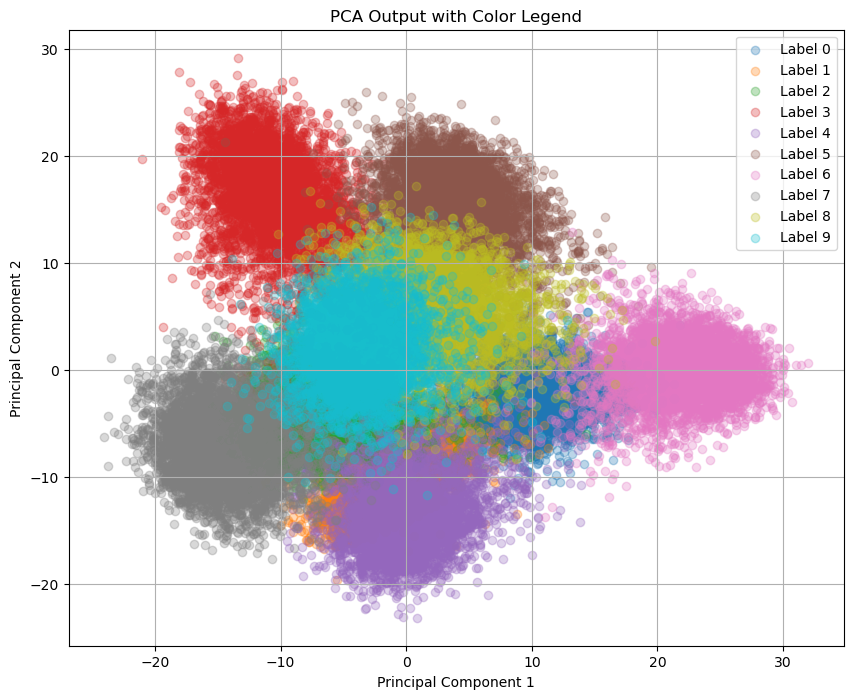

In [68]:
# Create a dictionary to map indices to labels
label_dict = {idx: label for idx, label in enumerate(flattened_image_labels)}

plt.figure(figsize=(10, 8))
for i in range(10): 
    indices = [idx for idx, label in enumerate(flattened_image_labels) if label == i]
    x = image_embedding_pca[indices, 0]
    y = image_embedding_pca[indices, 1]
    plt.scatter(x, y, label=f'Label {i}', alpha=0.3)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Output with Color Legend')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# EOF